In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

In [69]:
filename = 'data/zofia_hitler_kalib_2.txt'
df = pd.read_csv(filename, sep = '\t', header = 8, index_col=0)
try:
    df = df.drop(columns= ['Mic'])
except KeyError as e:
    pass

In [70]:
mid1 = df.iloc[:int(len(df)/6*0.9), :]
mid2 = df.iloc[int(len(df)/6 * 5.1) :, :]
lg = df.iloc[int(len(df)/6 * 1.1) : int(len(df)/6 * 1.9), :]
pg = df.iloc[int(len(df)/6 * 2.1) : int(len(df)/6 * 2.9), :]
ld = df.iloc[int(len(df)/6 * 3.1) : int(len(df)/6 * 3.9), :]
pdolny = df.iloc[int(len(df)/6 * 4.1) : int(len(df)/6 * 4.9), :]

In [71]:
plt.rcParams['figure.figsize'] = [10, 8]

In [72]:
m1 = mid1.mode()
m2 = mid2.mode()
m = m1.append(m2).mean().astype('int')
m


Eye_X    1561
Eye_Y    2696
dtype: int64

In [73]:
points = lg.mode().head(1).append(pg.mode().head(1)).append(ld.mode().head(1)).append(pdolny.mode().head(1)).append(m, ignore_index=True)
points

,Eye_X,Eye_Y
0,1558,2670
1,1571,2354
2,1292,2847
3,1737,2825
4,1561,2696


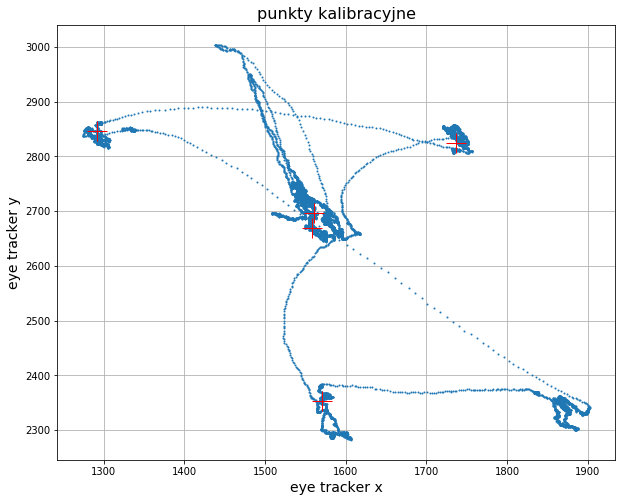

In [82]:
Eye_X, Eye_Y = (df).Eye_X, (df).Eye_Y
plt.plot(Eye_X, Eye_Y,"o",markersize=1)
plt.grid(True)
plt.xlabel('eye tracker x', fontsize=14)
plt.ylabel('eye tracker y', fontsize=14)
plt.title('punkty kalibracyjne', fontsize=16)
plt.plot(points.Eye_X, points.Eye_Y,"+r",markersize=20)
plt.savefig('zofia_kalib' + ".png")

In [83]:
df_pixels = points.copy()
df_pixels['x'] = pd.Series([0, 1280, 0, 1280, 640])
df_pixels['y'] = pd.Series([32, 32, 992, 992, 496])
df_pixels

,Eye_X,Eye_Y,x,y
0,1558,2670,0,32
1,1571,2354,1280,32
2,1292,2847,0,992
3,1737,2825,1280,992
4,1561,2696,640,496


In [84]:
def fit(x, a, b):
    return a * x + b

In [85]:
#Obliczenie parametrów funkcji liniowej dla składowej x
xdata_fit = np.array(df_pixels.Eye_X)
ydata_fit = np.array(df_pixels.x)
popt, pcov = curve_fit(fit, xdata_fit, ydata_fit)

ax, bx = popt

print(popt)
print()
print(np.sqrt(np.diag(pcov)))

[ 2.87466119e+00 -3.79790194e+03]

[1.61289578e+00 2.50061884e+03]


In [86]:
xfit = np.linspace(min(df_pixels.Eye_X)-100, max(df_pixels.Eye_X)+100, 2000, endpoint=True)
yfit = fit(xfit, *popt)

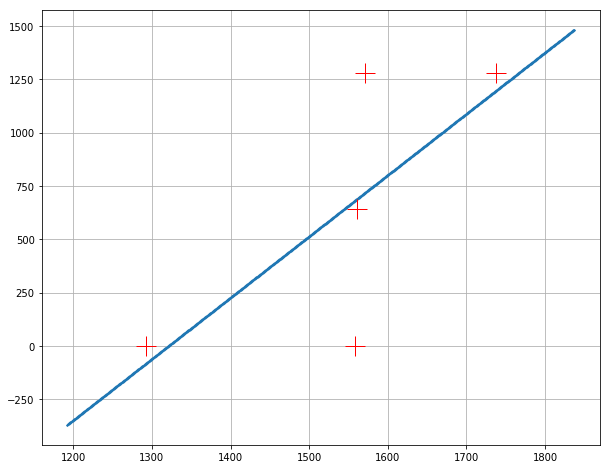

In [87]:
plt.plot(xfit, yfit,"o",markersize=1)
plt.grid(True)
plt.plot(df_pixels.Eye_X, df_pixels.x,"+r",markersize=20)

[ 1.99801972e+00 -4.84269601e+03]

[8.03047782e-01 2.15554139e+03]


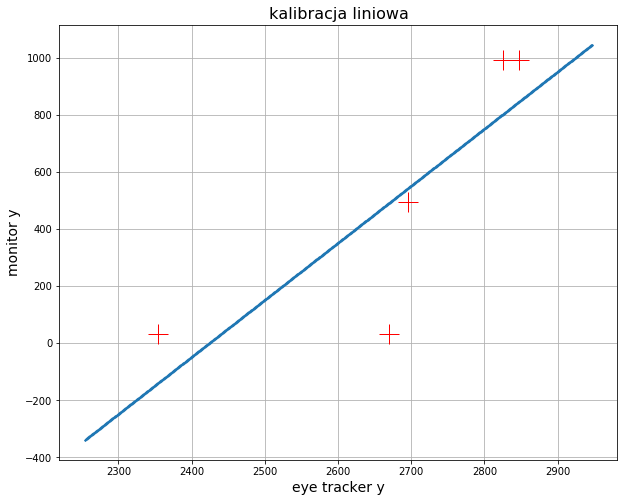

In [88]:
#Obliczenie parametrów funkcji liniowej dla składowej y
xdata_fit = np.array(df_pixels.Eye_Y)
ydata_fit = np.array(df_pixels.y)

popt, pcov = curve_fit(fit, xdata_fit, ydata_fit)
print(popt)
print()
print(np.sqrt(np.diag(pcov)))

ay, by = popt

xfit = np.linspace(min(df_pixels.Eye_Y)-100, max(df_pixels.Eye_Y)+100, 2000, endpoint=True)
yfit = fit(xfit, *popt)
plt.plot(xfit, yfit,"o",markersize=1)
plt.grid(True)
plt.plot(df_pixels.Eye_Y, df_pixels.y,"+r",markersize=20)
plt.xlabel('eye tracker y', fontsize=14)
plt.ylabel('monitor y', fontsize=14)
plt.title('kalibracja liniowa', fontsize=16)
plt.savefig('zofia_kalib_y' + ".png")

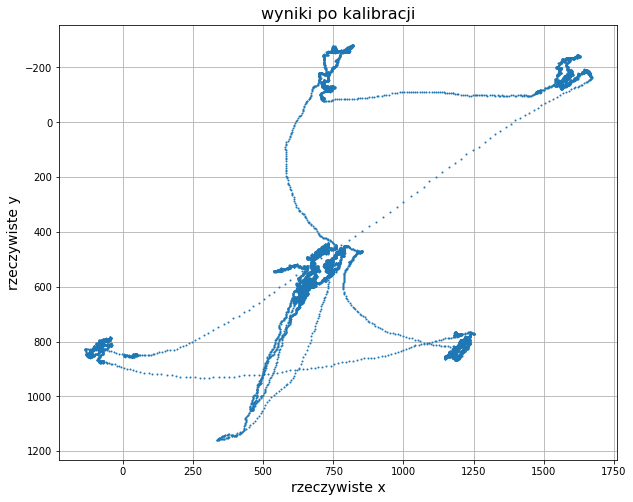

In [89]:
df2 = df * [ax, ay] + [bx, by]
Eye_X, Eye_Y = df2.Eye_X, df2.Eye_Y
#Eye_X, Eye_Y = df2.Eye_X, df2.Eye_Y * -1
plt.plot(Eye_X, Eye_Y,"o",markersize=1)
plt.grid(True)
plt.gca().invert_yaxis()
plt.xlabel('rzeczywiste x', fontsize=14)
plt.ylabel('rzeczywiste y', fontsize=14)
plt.title('wyniki po kalibracji', fontsize=16)
plt.savefig('zofia_after_kalib' + ".png")